Group: 70

Names: Yuri Manna, Mateusz Zbos, Martin Popov 

Student Numbers: i6316134, ixxxxxxx, i6316814

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 3

By completing and delivering the clinic tasks you will know how to :

1. Run Classification Models (Logistic Regression, Decision Trees, Random Forests, etc.) in Python
1. Explain and tackle issues like missing values or class inbalance in your dataset
1. Judge the results of a classification model using AUROC scores
1. Select a proper algorithm that works well with your data using techniques like:
    * Cross Validation
    * Regularization
    
---
### Important Dates

- Clinic release: Tue, 18th Feb
- **Clinic due**: Fri, 28th Feb late night (wildcards possible, apply to the group)
---
##  Some rules

* For this clinic, like the previous one, we are asking you to use specific libraries that are included in the `requirements.txt`. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.


# Context

In this clinic, we will continue navigating the amazing world of modeling and explore classification models under extreme inbalance and missing values scenarios.

The first part of the assignment (Questions 1-9) will help you understand the impact of inbalance and missingness in the classification performance and explore different scenarios on how to improve. Most steps are laid out for you, but you are welcome to deviate.

The second part of the assignment (Question 10) is purposefully left open-ended (as in the previous clinics). In this case, you will be allowed to compare different classifiers of your choice in an effort to deal with the imbalance in the data. You can also implement some of the techniques we discussed in class about imbalances. 

## Score breakdown

Question | Points
--- | ---
[Question 1](#q1) | 3
[Question 2](#q2) | 3
[Question 3](#q3) | 4
[Question 4](#q4) | 4
[Question 5](#q5) | 4
[Question 6](#q6) | 6
[Question 7](#q7) | 4
[Question 8](#q8) | 8
[Question 9](#q9) | 4
[Question 10](#q10)| 15 
Total | 55

This score will be scaled down to 1 and that will be your final clinic score.

In [259]:
#feel free to include additional libraries, as long as they are included in the requirements.txt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import scipy as sp
sns.set(context='paper')

## Part 1: Determine the Inbalance (Asymmetry)

First, we would like to notice in our data that they are highly unbalanced (assymetric). Load the data which should contain 9 columns (`health`, `age`, `sex`, `educ`, `sexornt`, `partyid`, `race`, `married`, `income`). `Age`, `educ` (how many years of education a person has) and `income` are quantitative, the others are qualitative.

In [260]:
gssdata=pd.read_csv("gssdata4.csv")
gssdata.head()

,health,age,sex,educ,sexornt,partyid,race,married,income
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0
2,good,59,male,13,heterosexual or straight,rep,white,1,NaN
3,excellent,74,female,17,heterosexual or straight,other,white,1,NaN
4,poor,37,female,10,heterosexual or straight,other,white,0,NaN


Our goal is to predict if a person is in poor health or not. Let's create some dummy variables in order to measure that.


In [261]:
poorhealth = np.where(gssdata['health'] == 'poor',1,0)
notpoorhealth = np.where(gssdata['health'] != 'poor',1,0)
gssdata['poorhealth'] = poorhealth
gssdata['notpoorhealth'] = notpoorhealth


In [262]:
gssdata.describe()

,age,educ,married,income,poorhealth,notpoorhealth
count,1551.000000,1551.000000,1551.000000,963.000000,1551.000000,1551.000000
mean,48.172792,13.803353,0.732431,15633.177570,0.063830,0.936170
std,17.051151,3.011700,0.442835,5064.191118,0.244528,0.244528
min,18.000000,0.000000,0.000000,500.000000,0.000000,0.000000
25%,33.500000,12.000000,0.000000,13750.000000,0.000000,1.000000
50%,48.000000,14.000000,1.000000,18750.000000,0.000000,1.000000
75%,61.000000,16.000000,1.000000,18750.000000,0.000000,1.000000
max,89.000000,20.000000,1.000000,18750.000000,1.000000,1.000000


### Question 1 <a name="q1"></a>

a) Can you quantify what is the degree of inbalance? Mention a percentage of the split between the positive and the negative class.<br>
b) What is the majority and the minority class?<br>
c) What would be the accuracy of a classifier that predicts everybody NOT being in poor health?<br>
d) Discuss (with each other and the teachers) why accuracy is not a good metric.<br>

**Your answer goes here**

a. Looking at the mean values for healhy and nonhealthy individuals, there is a very large imballance as 93.6% of the instances in the dataset are of people with good health

b. Majority class is the one of people with good health.

c. 93.62% 

d. On such a classifier, accuracy isnt a good metric since it has no predictive value due to it predicting only the majority class.

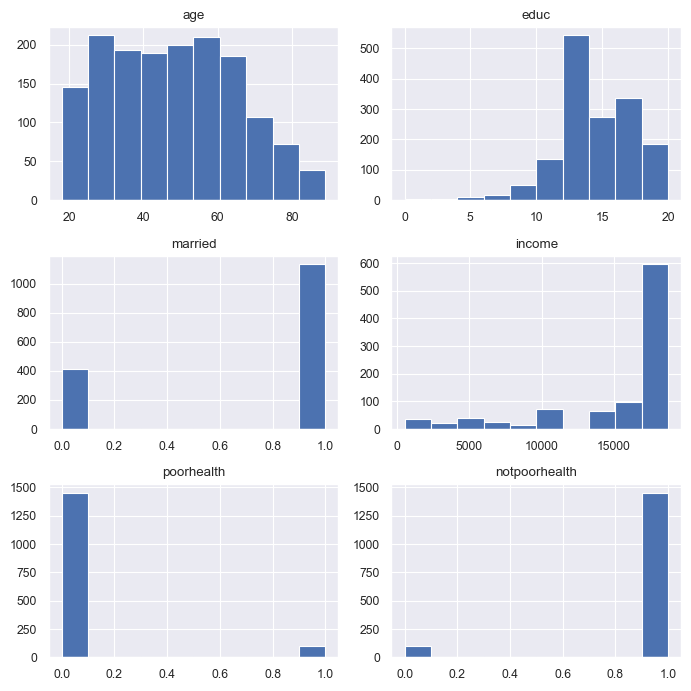

In [263]:
####HERE YOU CAN ADD CODE AND MORE COMMENTS

gssdata.hist(figsize=(7,7))
plt.tight_layout()

The age distribution is uniform up until older ages where there is a drop off 

If we consider college to be completed after 16 academic years, then a portion of the people in the dataset have completed it, as can be seen from the bars after 15 on the x-axis that indicate that ~300 + ~190 people have more than 15 years of academic journey. 

The healthy vs non-healthy disbalance is also reflected in the bottom two plots. 

## Part 2: Fit a logistic model ignoring missing values

Let's begin by fitting a logistic regression model to predict poor health based on several of the other predictors in the model. In part 3, you will be asked to regularize (with cross-validation) to make sure you do not overfit, but for this part, we will keep things simple.

First, we need to do a small amount of data clean-up (ignoring missingness for now in `income`). Best practice would be to split into train/test first before looking at the data, but again, we can keep it simple in this part.

If you ignore the missingness `sklearn` might crash (`ValueError: Input contains NaN, infinity or a value too large for dtype('float64')`.) So you can also consider not using that variable in the model

In [264]:
#creating dummies two ways
gssdata['female'] = 1*(gssdata['sex'] ==  'female')
dummy_vars = pd.get_dummies(gssdata[['sexornt','partyid','race']], drop_first=True)
gssdata = gssdata.join(dummy_vars)

In [265]:
#Let's get a sense of the data we have
print(gssdata.shape)
gssdata.head()


(1551, 19)


,health,age,sex,educ,sexornt,partyid,race,married,income,poorhealth,notpoorhealth,female,sexornt_dont know,sexornt_heterosexual or straight,sexornt_homosexual or gay,partyid_other,partyid_rep,race_other,race_white
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0,0,1,0,False,True,False,False,True,False,True
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0,0,1,1,False,True,False,False,True,False,True
2,good,59,male,13,heterosexual or straight,rep,white,1,NaN,0,1,0,False,True,False,False,True,False,True
3,excellent,74,female,17,heterosexual or straight,other,white,1,NaN,0,1,1,False,True,False,True,False,False,True
4,poor,37,female,10,heterosexual or straight,other,white,0,NaN,1,0,1,False,True,False,True,False,False,True


In [266]:
gssdata.describe()

,age,educ,married,income,poorhealth,notpoorhealth,female
count,1551.000000,1551.000000,1551.000000,963.000000,1551.000000,1551.000000,1551.000000
mean,48.172792,13.803353,0.732431,15633.177570,0.063830,0.936170,0.544165
std,17.051151,3.011700,0.442835,5064.191118,0.244528,0.244528,0.498206
min,18.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000
25%,33.500000,12.000000,0.000000,13750.000000,0.000000,1.000000,0.000000
50%,48.000000,14.000000,1.000000,18750.000000,0.000000,1.000000,1.000000
75%,61.000000,16.000000,1.000000,18750.000000,0.000000,1.000000,1.000000
max,89.000000,20.000000,1.000000,18750.000000,1.000000,1.000000,1.000000


### Question 2 <a name="q2"></a>

In the code below try to fit your logistic regression model and provide some short comments on the performance of the model. You don't need to be detailed (yet), but make sure to make 1-2 observations at least.

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# categorical model features only
feature_columns = [col for col in gssdata.columns if col not in ['health', 'poorhealth', 'notpoorhealth', 'income', 
                                                                'sex', 'sexornt', 'partyid', 'race']]
X = gssdata[feature_columns]
y = gssdata['poorhealth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9357

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       291
           1       0.00      0.00      0.00        20

    accuracy                           0.94       311
   macro avg       0.47      0.50      0.48       311
weighted avg       0.88      0.94      0.90       311



c:\Users\yurim\anaconda3\envs\UniMaas\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yurim\anaconda3\envs\UniMaas\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yurim\anaconda3\envs\UniMaas\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Your answer goes here**

Wooowwww such high accuracy but then it doesn't really matter because of the disbalance in the dataset. Also the recall and precision is 0 for class 1 because the model never predicts it due to there being only 6.4% poor health cases, which even though were included in the training, are not enough for the model to be able to generalize.

---

## 2a: Handling missingness approach \#1: remove observations. 

We do not know how sklearn will treat the missing values (the `NaN`s), so we should do handle them ourselves.  As a base case, let's remove all observations with missingness.

### Question 3 <a name="q3"></a>

In the code below, remove all observations that are not complete. Report on how many samples were dropped. Do a quick check to see how dropping observations affected the amount of poor health individuals. Do an appropriate plot to show this.

In [268]:
##In the code below: Remove all observations that are not complete
##Report on how many samples were dropped.

#Do a quick check to see how dropping observations affected the amount of poor health individuals
#Do an appropriate plot to show this (e.g. boxplot)

gssdata_full #<---this should be your final data frame.

,health,age,sex,educ,sexornt,partyid,race,married,income,poorhealth,notpoorhealth,female,sexornt_dont know,sexornt_heterosexual or straight,sexornt_homosexual or gay,partyid_other,partyid_rep,race_other,race_white
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0,0,1,0,False,True,False,False,True,False,True
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0,0,1,1,False,True,False,False,True,False,True
5,excellent,30,female,15,heterosexual or straight,other,other,1,18750.0,0,1,1,False,True,False,True,False,True,False
9,excellent,30,female,14,heterosexual or straight,other,black,1,16250.0,0,1,1,False,True,False,True,False,False,False
12,good,38,female,15,heterosexual or straight,dem,white,0,18750.0,0,1,1,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,good,62,male,12,heterosexual or straight,rep,white,1,18750.0,0,1,0,False,True,False,False,True,False,True
1547,good,56,male,12,heterosexual or straight,other,white,1,18750.0,0,1,0,False,True,False,True,False,False,True
1548,excellent,24,male,14,heterosexual or straight,dem,white,0,11250.0,0,1,0,False,True,False,False,False,False,True
1549,fair,27,male,13,heterosexual or straight,dem,white,0,18750.0,0,1,0,False,True,False,False,False,False,True


Impact of Removing Incomplete Observations:
Initial number of samples: 1551
Final number of samples: 963
Samples dropped: 588 (37.9%)

Poor Health Distribution:
Initial: 99 cases (6.4%)
Final: 16 cases (1.7%)


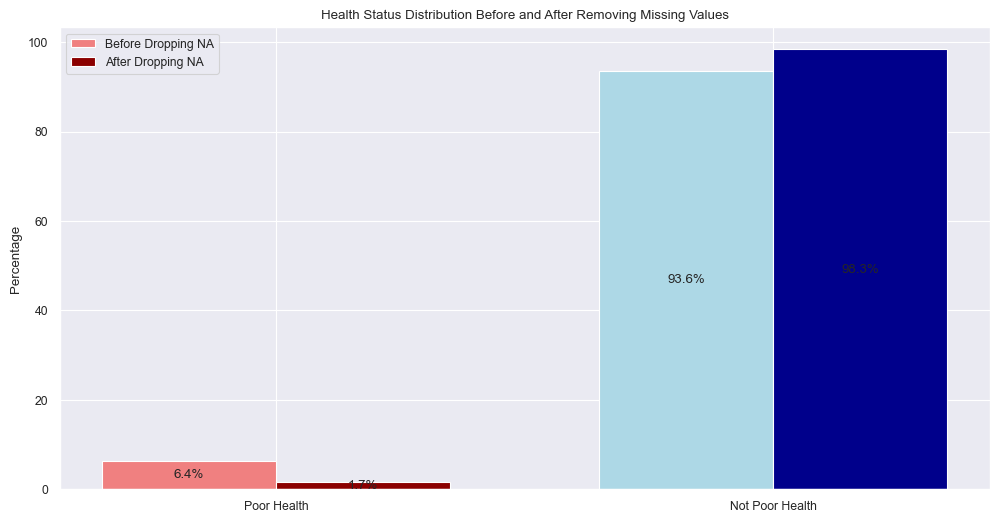

In [269]:
# initial counts
initial_total = len(gssdata)
initial_poor_health = gssdata['poorhealth'].sum()
initial_poor_health_pct = (initial_poor_health / initial_total) * 100

# remove incomplete instances
gssdata_full = gssdata.dropna()

# counts after removal
final_total = len(gssdata_full)
final_poor_health = gssdata_full['poorhealth'].sum()
final_poor_health_pct = (final_poor_health / final_total) * 100
print("Impact of Removing Incomplete Observations:")
print(f"Initial number of samples: {initial_total}")
print(f"Final number of samples: {final_total}")
print(f"Samples dropped: {initial_total - final_total} ({((initial_total - final_total)/initial_total)*100:.1f}%)")
print("\nPoor Health Distribution:")
print(f"Initial: {initial_poor_health} cases ({initial_poor_health_pct:.1f}%)")
print(f"Final: {final_poor_health} cases ({final_poor_health_pct:.1f}%)")
plt.figure(figsize=(12, 6))
x = np.arange(2)
width = 0.35
plt.bar(x - width/2, 
        [initial_poor_health_pct, 100-initial_poor_health_pct],
        width, 
        label='Before Dropping NA',
        color=['lightcoral', 'lightblue'])

plt.bar(x + width/2,
        [final_poor_health_pct, 100-final_poor_health_pct],
        width,
        label='After Dropping NA',
        color=['darkred', 'darkblue'])

plt.ylabel('Percentage')
plt.title('Health Status Distribution Before and After Removing Missing Values')
plt.xticks(x, ['Poor Health', 'Not Poor Health'])
plt.legend()

for i in x:
    plt.text(i - width/2, initial_poor_health_pct/2 if i == 0 else (100-initial_poor_health_pct)/2, 
             f'{initial_poor_health_pct:.1f}%' if i == 0 else f'{100-initial_poor_health_pct:.1f}%',
             ha='center', va='center')
    plt.text(i + width/2, final_poor_health_pct/2 if i == 0 else (100-final_poor_health_pct)/2,
             f'{final_poor_health_pct:.1f}%' if i == 0 else f'{100-final_poor_health_pct:.1f}%',
             ha='center', va='center')

plt.show()

**Your answer goes here**

After dropping incomplete instances we end up with an even larger disbalance between class 0 and 1 instances, as now we only have 1.66% of the dataset consisting of class 1 instances. It appreas missingness was more prominent for instances of non healthy people?

### Question 4 <a name="q4"></a>

Fit a logistic regression mode with `C=1000000` (that means that we don't any regularization) and evaluate the classification accuracy on the test set. Discuss whether this accuracy is good/bad.

Then move below to be reminded on the confusion matrix.

Model Performance Metrics:
Accuracy: 0.9845

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       190
           1       0.00      0.00      0.00         3

    accuracy                           0.98       193
   macro avg       0.49      0.50      0.50       193
weighted avg       0.97      0.98      0.98       193



c:\Users\yurim\anaconda3\envs\UniMaas\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yurim\anaconda3\envs\UniMaas\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yurim\anaconda3\envs\UniMaas\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


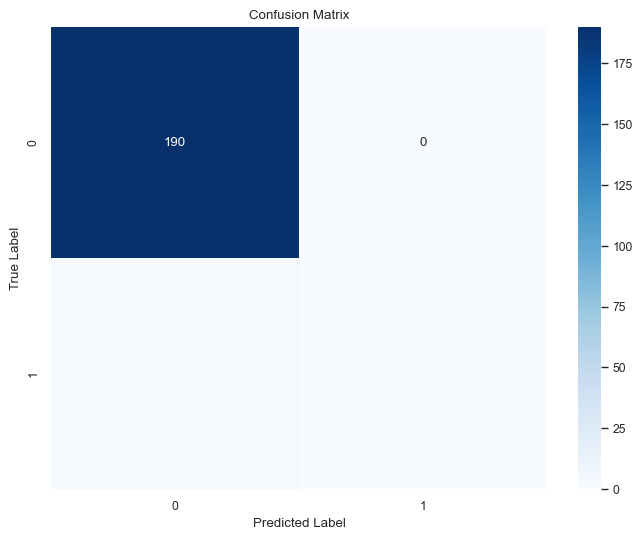

In [270]:
from sklearn.metrics import confusion_matrix

# Split the data
feature_columns = [col for col in gssdata.columns if col not in ['health', 'poorhealth', 'notpoorhealth', 
                                                                'sex', 'sexornt', 'partyid', 'race']]
X = gssdata_full[feature_columns]
y = gssdata_full['poorhealth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logit1 = LogisticRegression(C=1000000, max_iter=1000)
logit1.fit(X_train, y_train)
y_pred = logit1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Your answer goes here**

Accuracy improved a slight bit, but that's because we increased the imbalance of the data. The model still predicts all false labels, the only difference is that in percetage there are less true labels so accuracy is higher than before.


## Reminder: The Confusion Matrix & Some Useful Functions

- the samples that are +ive and the classifier predicts as +ive are called True Positives (TP)
- the samples that are -ive and the classifier predicts (wrongly) as +ive are called False Positives (FP)
- the samples that are -ive and the classifier predicts as -ive are called True Negatives (TN)
- the samples that are +ive and the classifier predicts as -ive are called False Negatives (FN)

A classifier produces a confusion matrix which looks like this:

![confusionmatrix](./confusionmatrix_360.png)


IMPORTANT NOTE: In `sklearn`, to obtain the confusion matrix in the form above, always have the observed `y` first, i.e.: use as `confusion_matrix(y_true, y_pred)`



In [271]:
#the name of your model should be logit1 (to work with the code below)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,logit1.predict(X_test)))

[[190   0]
 [  3   0]]


The following function can be used to create confusion tables with different thresholds (same as we did in the notebook explaing AUROC)

In [272]:
###manually making confusion table from a different threshold
def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

In [273]:
#Try it here!

print(confusion_matrix(y_test,t_repredict(logit1, 0.06, X_test)))
print(confusion_matrix(y_train,t_repredict(logit1, 0.06, X_train)))

[[181   9]
 [  3   0]]
[[721  36]
 [  9   4]]


The following fuction should create ROC curves for your models, based on the model and the ground truth. Feel free to change it and improve it!

In [274]:
#making ROC curves for this model
from sklearn.metrics import roc_curve, auc

#name: name of your model to appear on the figure (can be arbitrary)
#clf: the model as you named it - will be used for getting the predictions
#ytest, xtest: your test data
#skip, labe: steps that control how many points you see in the ROC curve and how many labels are there

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM? (but double-check this pleaseee)
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    
    #this is the single value for the AUC score
    roc_auc = auc(fpr, tpr)
    
    if skip: 
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    
    #add labels to the curve
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

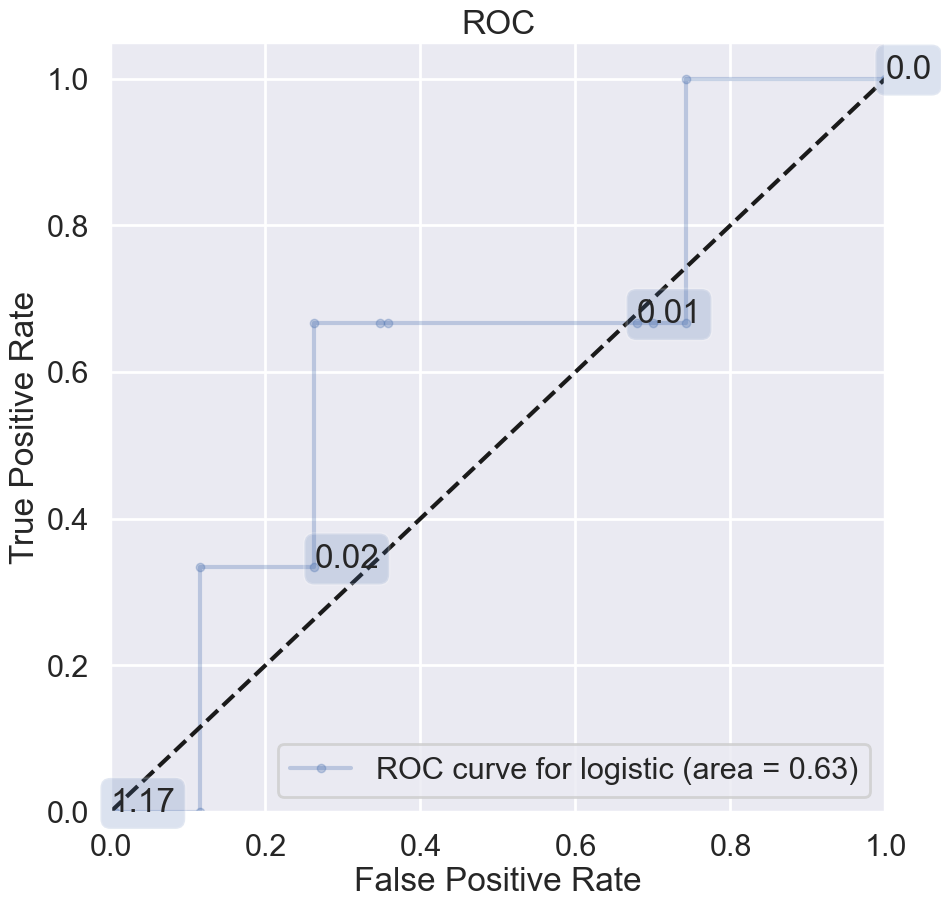

In [275]:
#This is how the above function should be used

sns.set_context("poster")
fig, ax = plt.subplots(figsize = (10,10))
ax=make_roc("logistic",logit1, y_test, X_test, labe=4, skip=0)
plt.show()

### Question 5 <a name="q5"></a>


What does the above ROC curve tell you about the quality of the model we fit on the data?

**Your answer goes here**

Its as we'd expect for the previously mentioned reasons. We get above 0.5 in a cases which is better than random but there's a lot more to be desired. 
Looking at the plot, there is no threshold that balances specificity and sensitivity to a satisfying degree.

## Let's get back the data with missingness

It's time to build a model to impute the missing data!

(963, 19)


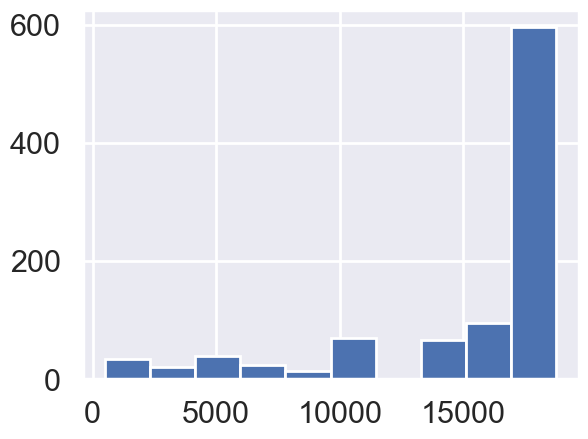

In [276]:
#first build a model to impute using data without missing 
hist = plt.hist(gssdata_full['income'])
print(gssdata_full.shape)

---

## 2b: Handling missingness approach \#2: impute the mean 

### Question 6 <a name="q6"></a>

In your first approach, make a copy of the original data frame and impute the missing values by assuming that every missing value shoudl be replaced by the mean. Make sure to do a histogram as well and compare it with the original!

Then fit a model (as before in 2a.) and judge the model accuracy. Use the functions for the ROC curve to establish the result.

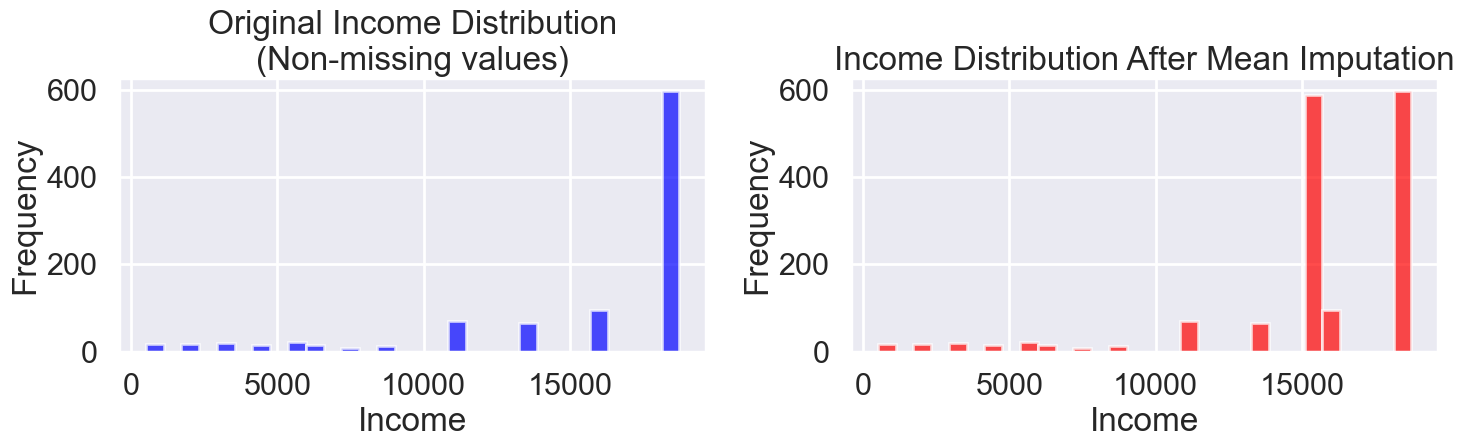

In [277]:
# copy then calculate and impute mean
gssdata_mean = gssdata.copy()
mean_income = gssdata_mean['income'].mean()
gssdata_mean['income'].fillna(mean_income, inplace=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# original distribution
ax1.hist(gssdata['income'].dropna(), bins=30, color='blue', alpha=0.7)
ax1.set_title('Original Income Distribution\n(Non-missing values)')
ax1.set_xlabel('Income')
ax1.set_ylabel('Frequency')
# imputed distribution
ax2.hist(gssdata_mean['income'], bins=30, color='red', alpha=0.7)
ax2.set_title('Income Distribution After Mean Imputation')
ax2.set_xlabel('Income')
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [278]:
X = gssdata_mean.drop(['health', 'poorhealth', 'notpoorhealth', 'sex', 'sexornt', 'partyid', 'race', 'married'], axis=1)
y = gssdata_mean['poorhealth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logit_mean = LogisticRegression(C=1000000, max_iter=1000)
logit_mean.fit(X_train, y_train)

LogisticRegression(C=1000000, max_iter=1000)

In [279]:
y_prob = logit_mean.predict_proba(X_test)[:, 1]

# Test different thresholds
thresholds = [0.2, 0.3,0.4]
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\nConfusion Matrix (threshold = {threshold}):")
    print("True Negative:", cm[0,0])
    print("False Positive:", cm[0,1])
    print("False Negative:", cm[1,0])
    print("True Positive:", cm[1,1])


Confusion Matrix (threshold = 0.2):
True Negative: 284
False Positive: 7
False Negative: 16
True Positive: 4

Confusion Matrix (threshold = 0.3):
True Negative: 289
False Positive: 2
False Negative: 20
True Positive: 0

Confusion Matrix (threshold = 0.4):
True Negative: 291
False Positive: 0
False Negative: 20
True Positive: 0


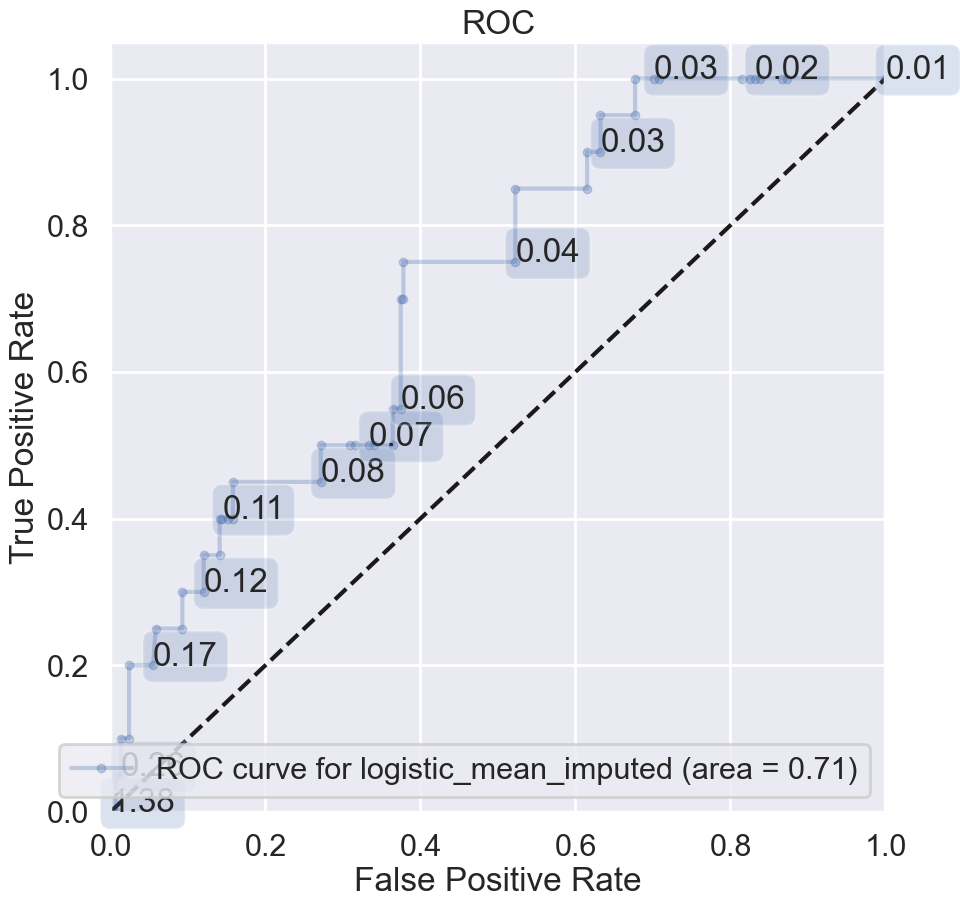

In [280]:
plt.figure(figsize=(10, 10))
ax = make_roc("logistic_mean_imputed", logit_mean, y_test, X_test, labe=4, skip=0)
plt.show()

### Question 7 <a name="q7"></a>


What does the above ROC curve tell you about the quality of the model we fit on the data?

**your answer goes here**

The area is 0.71, this is an improvement from the 0.63 we got from the previus question. However this is still a quite modest result. A perfect model would have an area under the curve of 1 and a random classifier would have 0.5, our results are closer to the latter so not very accurate. Another important aspect to look at is the shape of the curve, ideally the curve should get as close as possible to the top left corner. our curve deviates from the random diagonal line but is still far from the corner, this shows that the model is not very powerful (expecially at thresholds between 0.1 and 0.05 where its closer to the diagonal).

---

## 2c: Handling missingness approach \#3: impute with a model (linear regression here)

The third and most sophisticated approach would be to fit a linear model (multiple regression) to estimate income based on the other features (`age`, `educ`, `sex`, `partyid`).

### Question 8 <a name="q8"></a>

Train this model below and then use it in order to compute the missing values. The steps should be as follows:

+ figure out which observations have missing values for income,
+ create the values you will use for imputation by:<br>
a) calculating the predicted values for the observations with missingness using the linear model<br>
b) use these values to impute back into the income variable in the missing entries<br>
+ Do a histogram to see how does that look like

In [281]:
#use the dataset without NAs here
#train a model

#####################
# your code here: 

# get the index of missing values for income
from sklearn.linear_model import LinearRegression

# get the index of missing values for income
missing_index = gssdata.income[gssdata.income.isnull()].index

# X and y with income as the target
# Define X and y with income as the target
feature_columns = [col for col in gssdata.columns if col not in ['health', 'income', 
                                                                'sex', 'sexornt', 'partyid', 'race']]
X = gssdata_full[feature_columns]
y = gssdata_full['income']

# fit the model
model = LinearRegression()
model.fit(X, y)

# predict missing values
X_missing = gssdata.loc[missing_index][feature_columns]
missing_pred = model.predict(X_missing)

# round the predicted values to the nearest integer
missing_pred = np.round(missing_pred).astype(int)

print(f'missing values predicted sample: {missing_pred[:5]}')
#####################

missing values predicted sample: [17463 17641  8188 11618 11292]


Then fill the missing data with the results you got. You can do that multiple ways, one way to use Python would be the following:

In [282]:
#you might need to change some of the variables below, but in principle it should work
missing_index = gssdata.income[gssdata.income.isnull()].index
missing_series = pd.Series(data = missing_pred, index = missing_index)
#back to the data set with missingness and impute the predictions
gssdata_imp = gssdata.copy()
gssdata_imp['income'] = gssdata_imp['income'].fillna(missing_series)

count     1551.000000
mean     15465.374597
std       4288.853438
min        500.000000
25%      13750.000000
50%      16650.000000
75%      18750.000000
max      20742.000000
Name: income, dtype: float64

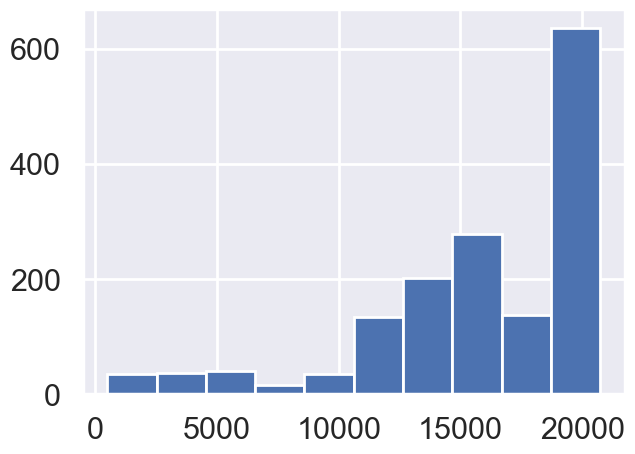

In [283]:
gssdata_imp['income'].hist(figsize=(7,5))
gssdata_imp['income'].describe()

In [284]:
# checking the data after imputation
print(gssdata_imp.shape)
gssdata_imp.describe()

(1551, 19)


,age,educ,married,income,poorhealth,notpoorhealth,female
count,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000
mean,48.172792,13.803353,0.732431,15465.374597,0.063830,0.936170,0.544165
std,17.051151,3.011700,0.442835,4288.853438,0.244528,0.244528,0.498206
min,18.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000
25%,33.500000,12.000000,0.000000,13750.000000,0.000000,1.000000,0.000000
50%,48.000000,14.000000,1.000000,16650.000000,0.000000,1.000000,1.000000
75%,61.000000,16.000000,1.000000,18750.000000,0.000000,1.000000,1.000000
max,89.000000,20.000000,1.000000,20742.000000,1.000000,1.000000,1.000000


In [285]:
#HERE FIT YOUR MODEL AS USUAL FOR PREDICTING THE HEALTH STATUS (POOR OR NOT)
###here, do a proper train/test split and a model training

#Now we will split the data before fitting any models, feel free to change this/adapt this to your taste
feature_columns = [col for col in gssdata.columns if col not in ['health', 'poorhealth', 'notpoorhealth', 
                                                                'sex', 'sexornt', 'partyid', 'race']]
X = gssdata_imp[feature_columns]
y = gssdata_imp['poorhealth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [286]:
#here you fit a model
logit3 = LogisticRegression()
logit3.fit(X_train, y_train)
y_pred = logit3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


#should be called logit3

Model Performance Metrics:
Accuracy: 0.9293

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       291
           1       0.00      0.00      0.00        20

    accuracy                           0.93       311
   macro avg       0.47      0.50      0.48       311
weighted avg       0.88      0.93      0.90       311



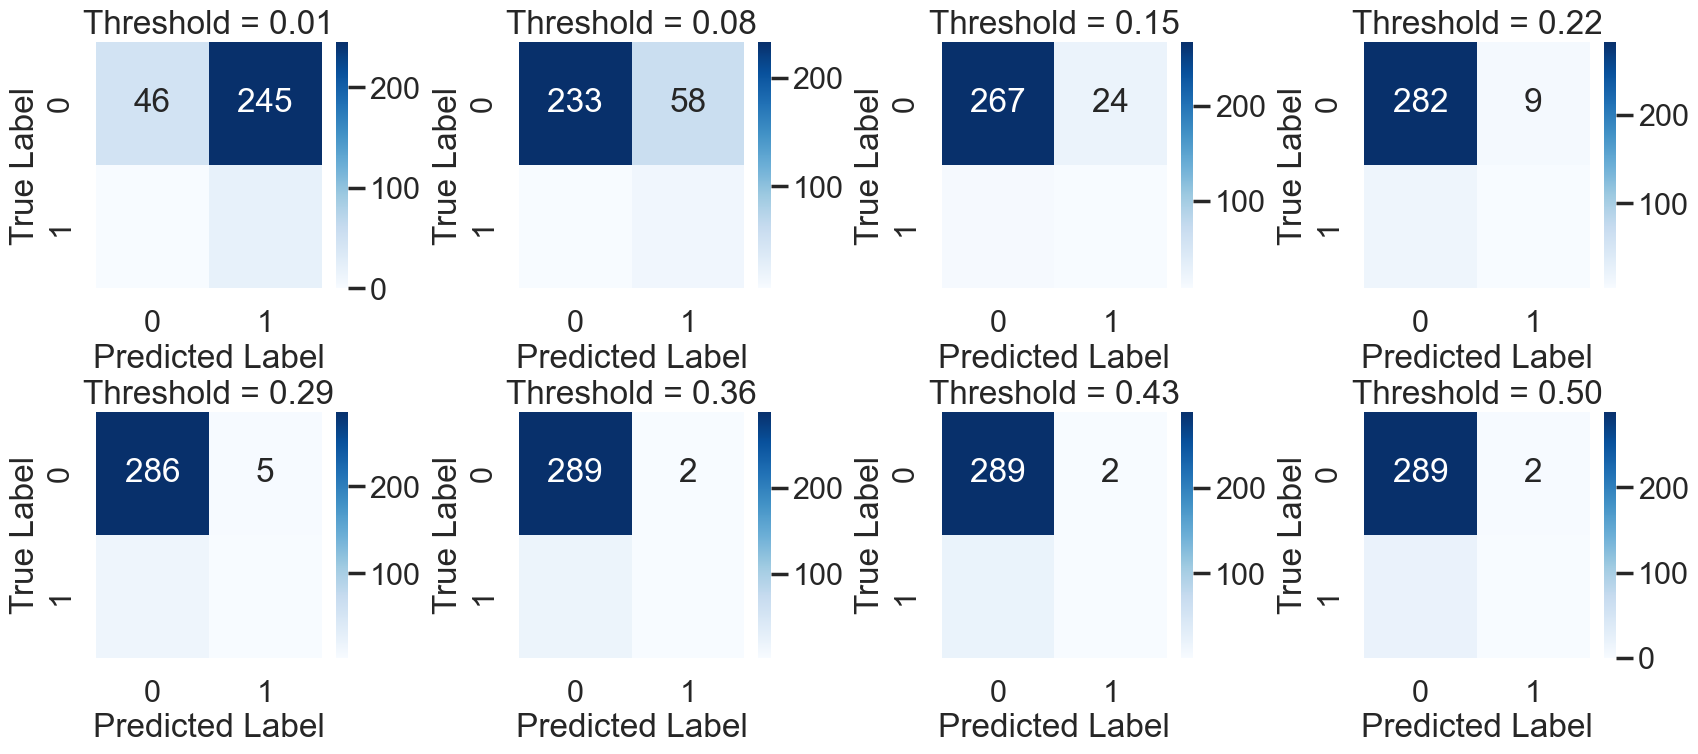

In [294]:
#MAKE CONFUSION TABLES FOR DIFFERENT THRESHOLDS AND DRAW THE AUROC CURVE

# Probabilities for the true class
y_probs = logit3.predict_proba(X_test)[:, 1]  

# Define different thresholds
thresholds = np.linspace(0.01, 0.5, 8)  # after 0.5, the confusion matrix will be the same

# Create a 2-row, 4-column grid
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten() 

for i, threshold in enumerate(thresholds):
    # Convert probabilities to binary predictions
    y_pred_threshold = (y_probs >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_threshold)

    # Plot each confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Threshold = {threshold:.2f}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.subplots_adjust(wspace=0.5, hspace=0.5) 
plt.show()

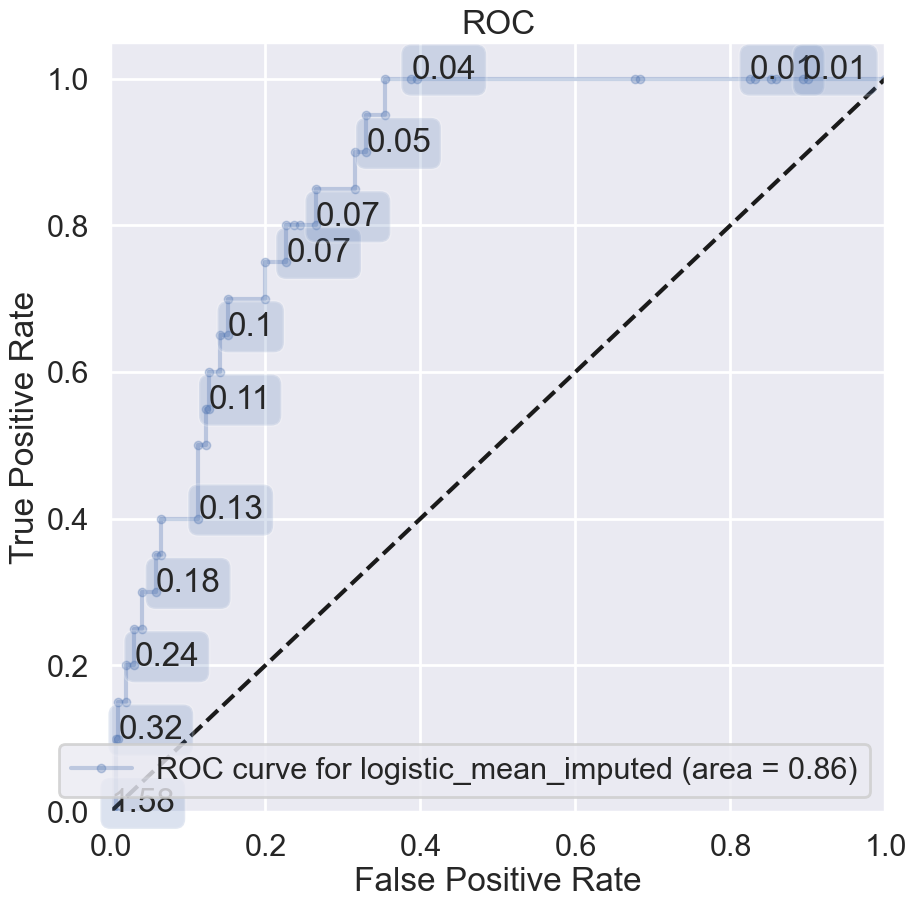

In [288]:

#####################
# your code here: create an ROC curve
#####################

plt.figure(figsize=(10, 10))
ax = make_roc("logistic_mean_imputed", logit3, y_test, X_test, labe=4, skip=0)
plt.show()

### Question 9 <a name="q9"></a>


Now comment on the performance of difference imputation methods and on the impact it has on the final model performance.


**Your answer goes here**

The curve has now improved even more, the area reached 0.86 which means now that the model has discrete predictive powers now. The shape of the curve also imporved a lot as it is "strictly concave" and gets closer to the upper left corner. Expecially at low thresholds the model is able to predict some true positives (if we don't care about false positives this might be a useful model).

We can say that the imputation of the income using a linear regression model instead of the mean has postively impacted the performance of the model, we can also see how important is the income for predicting poor health in this dataset.

## Part 3: Improving the model.

### Question 10 <a name="q10"></a>


Apply regularization (with cross-validation) to make sure not to overfit to the data and try also different models, like a Decision Tree or a Random Forest. Report on your results for which model handles inbalances in the best way.

For this question, you are also free (but not onbliged) to use techniques to address class imbalances (as we discussed in class) both on the data or model level. Recall that each method has advantages and disadvantages, so you will need to correctly interpret the results and assess the performance of any method you choose on the problem we explore here. Some examples can be found [here](https://imbalanced-learn.org/stable/index.html). 

In [ ]:
## your code goes here

# For zboshy:

# To summarize what we have here is some very imbalanced data, want to predict poor health status but only 5% of the data is poor health.
# In the previous questions we pretty much ignored the imbalance and just went to fix the missing data. we had income missing in some rows
# so what we did is first to not include it in the model, then used the mean and then used a linear regression model to predict the missing values.
# The first was shit the second a bit better and the third one kinda works at very low thresholds.